In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from IPython.display import clear_output
from tqdm import tqdm
import ipywidgets as widgets
from IPython.display import display
from thermo_models.VLEEmpiricalModel import *
from scipy.misc import derivative as der
import math
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List, Tuple
from scipy.optimize import fsolve
import ipywidgets as widgets
from IPython.display import display
from thermo_models.RaoultsLawModel import *
from distillation.DistillationModel import DistillationModel
from utils.AntoineEquation import * 
from IPython.display import clear_output
from tqdm import tqdm
from distillation.DistillationTernary import *
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive, Button, VBox, HBox, Output
from IPython.display import clear_output
from thermo_models.WilsonModel import *

In [2]:
# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)


xF = np.array([0.3, 0.3, 0.4])
xD = np.array([0.990, 0.0100, 1e-10])
xB = np.array([1e-5, 0.4261,0.5749])
r = 0 # starting value

vle_model = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])
distillation_model = DistillationModelTernary(vle_model, xF = xF, xD = xD, xB = xB, reflux = r)

# u1 = x1, u2 = x2
def eqns(uvec, l):
    u1 = uvec[0]; u2 = uvec[1]
    res = np.zeros(2)

    thermo_sol = distillation_model.thermo_model.convert_x_to_y(np.array([u1, u2, 1-u1-u2]))[0]
    rectifying_sol = distillation_model.change_r(l).rectifying_step_xtoy(np.array([u1, u2, 1-u1-u2]))

    res[0] = thermo_sol[0] - rectifying_sol[0]
    res[1] = thermo_sol[1] - rectifying_sol[1]

    return res

def eqns_aug(uvec, tau, ds, u0):
    l         = uvec[-1]
    res       = np.zeros_like(uvec)
    res[0:-1] = eqns(uvec[:-1], l)
    res[-1]   = ((uvec[0] - u0[0])*tau[0]) + ((uvec[1] - u0[1])*tau[1]) + ((uvec[2] - u0[2])*tau[2]) - ds

    return res

ds = 0.001
num_steps = 50000
lam_m1 = 0.001
old_sol_m1 = fsolve(eqns, x0=np.array([0.001, 0.001]), args=(lam_m1,))
lam_0 = lam_m1 + ds
old_sol = fsolve(eqns, x0=old_sol_m1, args=(lam_0,))

u1_sol = np.zeros((num_steps))
u2_sol = np.zeros((num_steps))
l_sol  = np.zeros((num_steps))

for i in range(num_steps):
    if i % 1000 == 0:
        print(i)
    # Solve for tangent vector
    # del_s       = math.sqrt(np.linalg.norm(lam_0 - lam_m1)**2)
    del_s = ds
    # Approximation from eqn 8 of Laing
    tau       = np.array([ (old_sol[0] - old_sol_m1[0])/del_s, (old_sol[1] - old_sol_m1[1])/del_s, (lam_0 - lam_m1)/del_s  ])

    prev_sol    = np.array([old_sol[0], old_sol[1], lam_0])
    new_sol     = fsolve(eqns_aug, x0 = prev_sol + ds*tau, args = (tau, ds, prev_sol))
    
    # Edit the variables that hold the two prior solutions
    lam_m1, lam_0 = lam_0, new_sol[-1]
    old_sol_m1 = np.copy(old_sol)
    old_sol    = np.copy(new_sol[:-1])

    if abs(lam_m1 - lam_0) > 1:
        break
    
    u1_sol[i] = old_sol[0]
    u2_sol[i] = old_sol[1]
    l_sol[i] = lam_0

x2r_u1 = u1_sol
x2r_u2 = u2_sol
x2r_l = l_sol

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [4]:
# THIS IS FOR STRIPPING LINE

# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)


xF = np.array([0.3, 0.3, 0.4])
xD = np.array([0.990, 0.0100, 1e-10])
xB = np.array([1e-5, 0.4261,0.5749])
r = 0 # starting value

vle_model = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])
distillation_model = DistillationModelTernary(vle_model, xF = xF, xD = xD, xB = xB, reflux = r)

# u1 = x1, u2 = x2
def eqns(uvec, l):
    u1 = uvec[0]; u2 = uvec[1]
    res = np.zeros(2)

    thermo_sol = distillation_model.thermo_model.convert_x_to_y(np.array([u1, u2, 1-u1-u2]))[0]
    rectifying_sol = distillation_model.change_r(l).stripping_step_xtoy(np.array([u1, u2, 1-u1-u2]))

    res[0] = thermo_sol[0] - rectifying_sol[0]
    res[1] = thermo_sol[1] - rectifying_sol[1]

    return res

def eqns_aug(uvec, tau, ds, u0):
    l         = uvec[-1]
    res       = np.zeros_like(uvec)
    res[0:-1] = eqns(uvec[:-1], l)
    res[-1]   = ((uvec[0] - u0[0])*tau[0]) + ((uvec[1] - u0[1])*tau[1]) + ((uvec[2] - u0[2])*tau[2]) - ds

    return res
    
ds = 0.001
num_steps = 50000
lam_m1 = 0.7427975945893878
old_sol_m1 = fsolve(eqns, x0=np.array([0.18010871121841818, 0.4180232107502042]), args=(lam_m1,))
print(old_sol_m1)
lam_0 = lam_m1 + ds
old_sol = fsolve(eqns, x0=old_sol_m1, args=(lam_0,))
print(old_sol)

u1_sol = np.zeros((num_steps))
u2_sol = np.zeros((num_steps))
l_sol  = np.zeros((num_steps))

for i in range(num_steps):
    if i % 1000 == 0:
        print(i)
    # Solve for tangent vector
    # del_s       = math.sqrt(np.linalg.norm(lam_0 - lam_m1)**2)
    del_s = ds
    # Approximation from eqn 8 of Laing
    tau       = np.array([ (old_sol[0] - old_sol_m1[0])/del_s, (old_sol[1] - old_sol_m1[1])/del_s, (lam_0 - lam_m1)/del_s  ])

    prev_sol    = np.array([old_sol[0], old_sol[1], lam_0])
    new_sol     = fsolve(eqns_aug, x0 = prev_sol + ds*tau, args = (tau, ds, prev_sol))
    
    # Edit the variables that hold the two prior solutions
    lam_m1, lam_0 = lam_0, new_sol[-1]
    old_sol_m1 = np.copy(old_sol)
    old_sol    = np.copy(new_sol[:-1])

    if abs(lam_m1 - lam_0) > 1:
        break
    
    u1_sol[i] = old_sol[0]
    u2_sol[i] = old_sol[1]
    l_sol[i] = lam_0

x1s_u1 = u1_sol
x1s_u2 = u2_sol
x1s_l = l_sol

[0.18010871 0.41802321]
[0.18032614 0.41791132]
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


In [39]:
# Antoine Parameters for benzene
Ben_A = 4.72583
Ben_B = 1660.652
Ben_C = -1.461

# Antoine Parameters for toluene
Tol_A = 4.07827
Tol_B = 1343.943
Tol_C = -53.773

# Antoine Parameters for Xylene
Xyl_A = 4.14553
Xyl_B = 1474.403
Xyl_C = -55.377

P_sys = 1.0325
# Create Antoine equations for benzene and toluene
benzene_antoine = AntoineEquationBase10(Ben_A, Ben_B, Ben_C)
toluene_antoine = AntoineEquationBase10(Tol_A, Tol_B, Tol_C)
xylene_antoine = AntoineEquationBase10(Xyl_A, Xyl_B, Xyl_C)


xF = np.array([0.3, 0.3, 0.4])
xD = np.array([0.990, 0.0100, 1e-10])
xB = np.array([1e-5, 0.4261,0.5749])
r = 0 # starting value

vle_model = RaoultsLawModel(3,P_sys,[benzene_antoine, toluene_antoine, xylene_antoine])
distillation_model = DistillationModelTernary(vle_model, xF = xF, xD = xD, xB = xB, reflux = r)

# u1 = x1, u2 = x2
def eqns(uvec, l):
    u1 = uvec[0]; u2 = uvec[1]
    res = np.zeros(2)

    thermo_sol = distillation_model.thermo_model.convert_x_to_y(np.array([u1, u2, 1-u1-u2]))[0]
    rectifying_sol = distillation_model.change_r(l).rectifying_step_xtoy(np.array([u1, u2, 1-u1-u2]))

    res[0] = thermo_sol[0] - rectifying_sol[0]
    res[1] = thermo_sol[1] - rectifying_sol[1]

    return res

def eqns_aug(uvec, tau, ds, u0):
    l         = uvec[-1]
    res       = np.zeros_like(uvec)
    res[0:-1] = eqns(uvec[:-1], l)
    res[-1]   = ((uvec[0] - u0[0])*tau[0]) + ((uvec[1] - u0[1])*tau[1]) + ((uvec[2] - u0[2])*tau[2]) - ds

    return res

ds = -0.001
num_steps = 50000
lam_m1 = 40
old_sol_m1 = fsolve(eqns, x0=np.array([0, 0]), args=(lam_m1,))
print(old_sol_m1)
lam_0 = lam_m1 + ds
old_sol = fsolve(eqns, x0=old_sol_m1, args=(lam_0,))
print(old_sol)

u1_sol = np.empty((num_steps))
u2_sol = np.empty((num_steps))
l_sol  = np.empty((num_steps))

for i in range(num_steps):
    if i % 1000 == 0:
        print('x1 x2 = ' + str(old_sol) + ', l = ' + str(lam_0))

    # Solve for tangent vector
    # del_s       = math.sqrt(np.linalg.norm(lam_0 - lam_m1)**2)
    del_s = ds
    # Approximation from eqn 8 of Laing
    tau       = np.array([ (old_sol[0] - old_sol_m1[0])/del_s, (old_sol[1] - old_sol_m1[1])/del_s, (lam_0 - lam_m1)/del_s  ])

    prev_sol    = np.array([old_sol[0], old_sol[1], lam_0])
    new_sol     = fsolve(eqns_aug, x0 = prev_sol + ds*tau, args = (tau, ds, prev_sol))
    
    # Edit the variables that hold the two prior solutions
    lam_m1, lam_0 = lam_0, new_sol[-1]
    old_sol_m1 = np.copy(old_sol)
    old_sol    = np.copy(new_sol[:-1])
    
    u1_sol[i] = old_sol[0]
    u2_sol[i] = old_sol[1]
    l_sol[i] = lam_0

x3r_u1 = u1_sol
x3r_u2 = u2_sol
x3r_l = l_sol

[0.00671467 0.0002334 ]
[0.00671484 0.0002334 ]
x1 x2 = [0.00671484 0.0002334 ], l = 39.999
x1 x2 = [0.00688619 0.00023936], l = 38.99900001470227
x1 x2 = [0.00706652 0.00024563], l = 37.9990000309851
x1 x2 = [0.00725655 0.00025223], l = 36.99900004906683
x1 x2 = [0.00745709 0.00025921], l = 35.99900006920291
x1 x2 = [0.00766902 0.00026657], l = 34.99900009169357
x1 x2 = [0.00789335 0.00027437], l = 33.99900011689333
x1 x2 = [0.0081312  0.00028264], l = 32.99900014522266
x1 x2 = [0.00838384 0.00029142], l = 31.999000177182914
x1 x2 = [0.00865267 0.00030077], l = 30.99900021337498
x1 x2 = [0.00893932 0.00031074], l = 29.99900025452306
x1 x2 = [0.00924562 0.00032138], l = 28.999000301505525
x1 x2 = [0.00957365 0.00033279], l = 27.999000355394184
x1 x2 = [0.00992581 0.00034503], l = 26.999000417506146
x1 x2 = [0.01030488 0.00035821], l = 25.99900048947198
x1 x2 = [0.01071405 0.00037244], l = 24.99900057332596
x1 x2 = [0.01115706 0.00038784], l = 23.999000671628007
x1 x2 = [0.01163829 0.00

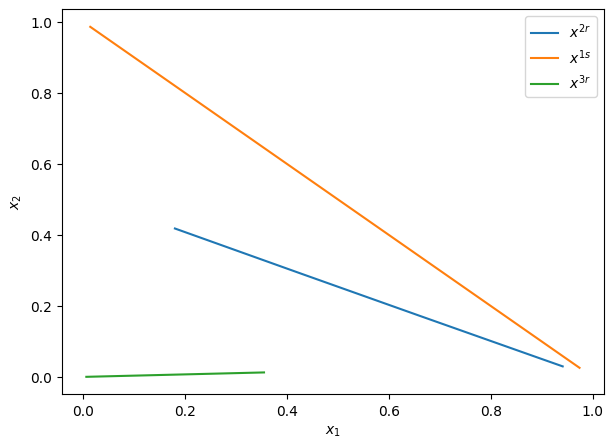

In [59]:
fig, ax = plt.subplots(figsize = (7,5))

ax.plot(x1s_u1, x1s_u2, label=r'$x^{2r}$')
ax.plot(x2r_u1, x2r_u2, label=r'$x^{1s}$')
ax.plot(x3r_u1[0:39400], x3r_u2[0:39400], label=r'$x^{3r}$')



ax.set_xlabel(r'$x_1$')
ax.set_ylabel(r'$x_2$')
ax.legend()
# plt.tight_layout()

plt.show()

10.764995393425025
nan
nan


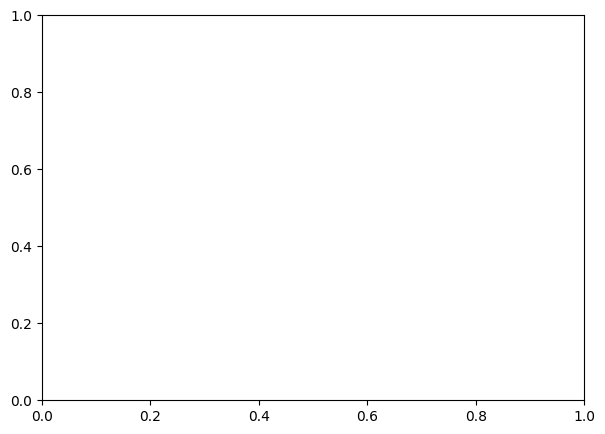

In [33]:
fig, ax = plt.subplots(figsize = (7,5))

print(x3r_u1[-1])
print(x3r_u2[-1])
print(x3r_l[-1])